##### **Internship 2025 - Ouiam EL HAJJI**

## $$ \textit{Predictive and Exploratory Models in CNS tumors using ctDNA}  $$
<div align="center">

<h5>Department of Computational Biology and Medical Sciences  $$ \textit{University of Tokyo} $$ </h5>

</div>
________________________________________________________________________________________________________________________________________________

$$ \textit{Objective 1 : Predict Overall Survival} $$
**Goal** : Predict overall survival (OS_MONTHS, OS_STATUS) using genetic and clinical features.

**Pipeline** :
- Create patient × features matrix (mutation presence, TMB_NONSYNONYMOUS, SEX, CANCER_TYPE, SAMPLE_CLASS)
- Encode categorical variables
- Train/test split
- Apply models:
  • Classification: Logistic Regression, Random Forest, XGBoost, SVM
  • Regression: Linear Regression, GradientBoostingRegressor
  • Survival: Cox Model, Random Survival Forest
Explore:
- Key predictors of survival
- Linear vs non-linear models
- Which mutations drive short/long survival

### $$ \text{I.    Datasets managment (merging, cleaning,...)} $$

In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### **Patient dataset (survival, duration, sex)**

In [305]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_clinical_patient.txt'

pd.set_option('display.max_columns', None)

df_cerebros_patient = pd.read_csv(file_name, sep = "\t", skiprows=4)
df_cerebros_patient

,PATIENT_ID,OS_MONTHS,OS_STATUS,SEX
0,P-0042717,4.241049,1:DECEASED,Male
1,P-0053191,38.399579,1:DECEASED,Female
2,P-0074598,6.509518,0:LIVING,Male
3,P-0037509,11.243712,1:DECEASED,Male
4,P-0046067,58.618536,0:LIVING,Male
...,...,...,...,...
706,P-0006299,103.593385,0:LIVING,Female
707,P-0052502,53.687083,0:LIVING,Male
708,P-0075798,29.884604,0:LIVING,Male
709,P-0043477,10.980702,1:DECEASED,Female


### **Patient sample dataset (TMB_NONSYNONYMOUS, CANCER_TYPE,...)**

In [383]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_clinical_sample.txt'

pd.set_option('display.max_columns', None)

df_cerebros_sample = pd.read_csv(file_name, sep = "\t", skiprows = 4)
df_cerebros_sample

,SAMPLE_ID,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS
0,P-0042717-T03-IM6,P-0042717,LUNG,Positive,Matched,0.100000,Lung Cancer,Lung,ctDNA
1,P-0053191-T09-IM7,P-0053191,MNET,Positive,Matched,0.100000,Miscellaneous Neuroepithelial Tumor,Miscellaneous Neuroepithelial Tumor,ctDNA
2,P-0074598-T01-IM7,P-0074598,GNOS,Positive,Matched,0.000000,Miscellaneous Brain Tumor,"Glioma, NOS",ctDNA
3,P-0037509-T02-IM6,P-0037509,GNOS,Positive,Matched,0.200000,Cancer of Unknown Primary,"Glioma, NOS",ctDNA
4,P-0046067-T05-IM6,P-0046067,PRNET,Positive,Matched,0.000000,Miscellaneous Brain Tumor,Primary Neuroepithelial Tumor,ctDNA
...,...,...,...,...,...,...,...,...,...
1002,P-0001281-T03-IM6,P-0001281,GNOS,Negative,Matched,0.000000,Glioma,"Glioma, NOS",ctDNA
1003,P-0049043-T01-IM6,P-0049043,EMBT,Positive,Matched,0.033333,Embryonal Tumor,Embryonal Tumor,ctDNA
1004,P-0071305-T02-IM7,P-0071305,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA
1005,P-0082845-T01-IM7,P-0082845,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA


### **Get unique values**

In [83]:
unique_values = df_cerebros['P-0054168-T01-IM6'].unique()
print(unique_values , len(df_cerebros.columns.unique()))

### **Mutation dataset : Mutation*Patient matrix**

In [347]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_cna.txt'

pd.set_option('display.max_columns', None)

df_cerebros = pd.read_csv(file_name, sep = "\t", index_col = 'Hugo_Symbol')



df_cerebros

,P-0071527-T01-IM7,P-0054168-T01-IM6,P-0064311-T02-IM7,P-0080115-T03-IM7,P-0066284-T01-IM7,P-0035665-T07-IM6,P-0057571-T03-IM7,P-0049043-T05-IM7,P-0064769-T05-IM7,P-0005114-T09-IM7,P-0082740-T02-IM7,P-0038911-T03-IM7,P-0064701-T02-IM7,P-0083253-T01-IM7,P-0065133-T01-IM7,P-0057140-T01-IM6,P-0033781-T02-IM7,P-0030797-T05-IM7,P-0053191-T03-IM7,P-0057194-T02-IM7,P-0047497-T04-IM7,P-0031477-T02-IM6,P-0005114-T10-IM7,P-0063487-T02-IM7,P-0059163-T03-IM7,P-0066628-T01-IM7,P-0070643-T01-IM7,P-0039410-T02-IM6,P-0018869-T03-IM6,P-0077397-T03-IM7,P-0030797-T04-IM7,P-0074634-T03-IM7,P-0017166-T03-IM7,P-0039162-T03-IM7,P-0071817-T03-IM7,P-0059163-T04-IM7,P-0072349-T01-IM7,P-0034907-T02-IM7,P-0062362-T01-IM7,P-0061628-T02-IM7,P-0010089-T02-IM7,P-0060604-T02-IM7,P-0018237-T02-IM7,P-0057571-T02-IM7,P-0011363-T03-IM7,P-0050340-T02-IM6,P-0068442-T03-IM7,P-0081493-T01-IM7,P-0070225-T07-IM7,P-0022993-T04-IM6,P-0055502-T14-IM7,P-0057016-T04-IM7,P-0023860-T13-IM7,P-0059163-T02-IM7,P-0041327-T05-IM6,P-0015964-T05-IM7,P-0061628-T04-IM7,P-0059466-T03-IM7,P-0050570-T03-IM7,P-0030589-T03-IM7,P-0072162-T01-IM7,P-0061635-T04-IM7,P-0047618-T01-IM6,P-0061628-T03-IM7,P-0086273-T02-IM7,P-0049539-T02-IM6,P-0056056-T04-IM7,P-0027683-T02-IM6,P-0035665-T10-IM7,P-0057571-T01-IM6,P-0060121-T05-IM7,P-0055106-T03-IM7,P-0043051-T05-IM7,P-0064311-T01-IM7,P-0039410-T03-IM7,P-0074138-T03-IM7,P-0019595-T02-IM6,P-0067969-T03-IM7,P-0017319-T08-IM6,P-0051534-T02-IM7,P-0042807-T03-IM6,P-0027013-T02-IM7,P-0003833-T03-IM6,P-0065133-T04-IM7,P-0048233-T01-IM6,P-0065588-T02-IM7,P-0025189-T02-IM6,P-0076919-T01-IM7,P-0025858-T02-IM7,P-0059163-T06-IM7,P-0039751-T02-IM7,P-0074138-T01-IM7,P-0080115-T06-IM7,P-0036307-T04-IM6,P-0039237-T02-IM7,P-0041409-T05-IM7,P-0044010-T03-IM7,P-0032790-T05-IM6,P-0039410-T04-IM7,P-0033449-T04-IM7,P-0073120-T12-IM7,P-0009538-T02-IM6,P-0061468-T02-IM7,P-0012836-T04-IM7,P-0007705-T02-IM6,P-0064587-T01-IM7,P-0080052-T02-IM7,P-0027848-T04-IM7,P-0058861-T01-IM7,P-0043866-T04-IM6,P-0064769-T03-IM7,P-0049043-T07-IM7,P-0073120-T13-IM7,P-0086273-T01-IM7,P-0025858-T03-IM7,P-0032183-T05-IM6,P-0065588-T01-IM7,P-0054722-T07-IM7,P-0042717-T03-IM6,P-0084980-T01-IM7,P-0063757-T01-IM7,P-0032909-T03-IM6,P-0039631-T02-IM6,P-0063190-T04-IM7,P-0037338-T03-IM6,P-0039237-T03-IM7,P-0074393-T01-IM7,P-0041409-T04-IM6,P-0041976-T02-IM6,P-0012674-T02-IM6,P-0027848-T06-IM7,P-0080335-T02-IM7,P-0053993-T02-IM6,P-0028620-T03-IM7,P-0074139-T01-IM7,P-0033609-T03-IM7,P-0049043-T06-IM7,P-0011338-T02-IM7,P-0061628-T01-IM7,P-0062982-T03-IM7,P-0069477-T03-IM7,P-0059357-T02-IM7,P-0059475-T02-IM7,P-0055378-T02-IM6,P-0022838-T02-IM7,P-0052605-T02-IM7,P-0006280-T03-IM7,P-0004455-T02-IM7,P-0078566-T01-IM7,P-0041221-T02-IM6,P-0043598-T01-IM6,P-0027848-T05-IM7,P-0043593-T02-IM6,P-0008881-T02-IM7,P-0036307-T02-IM6,P-0054088-T03-IM6,P-0050637-T03-IM6,P-0059163-T05-IM7,P-0047802-T02-IM6,P-0055497-T01-IM6,P-0082840-T02-IM7,P-0039860-T05-IM6,P-0080052-T04-IM7,P-0053993-T01-IM6,P-0069008-T05-IM7,P-0051294-T03-IM6,P-0049146-T03-IM7,P-0080882-T01-IM7,P-0039266-T03-IM6,P-0078894-T01-IM7,P-0071611-T01-IM7,P-0074280-T02-IM7,P-0076799-T02-IM7,P-0028620-T07-IM7,P-0064933-T03-IM7,P-0011420-T03-IM7,P-0034682-T04-IM7,P-0057200-T04-IM7,P-0080052-T06-IM7,P-0061518-T03-IM7,P-0043625-T02-IM6,P-0035713-T02-IM7,P-0013777-T03-IM6,P-0078897-T05-IM7,P-0038248-T02-IM6,P-0035324-T03-IM6,P-0067602-T02-IM7,P-0028620-T06-IM7,P-0078835-T01-IM7,P-0020236-T05-IM6,P-0064482-T04-IM7,P-0061518-T04-IM7,P-0077777-T02-IM7,P-0046726-T05-IM7,P-0055117-T02-IM7,P-0070128-T08-IM7,P-0073120-T10-IM7,P-0083747-T01-IM7,P-0059307-T01-IM7,P-0017319-T04-IM6,P-0021797-T05-IM7,P-0055579-T02-IM7,P-0052714-T01-IM6,P-0062486-T02-IM7,P-0032721-T04-IM7,P-0078571-T01-IM7,P-0006883-T02-IM6,P-0061712-T01-IM7,P-0040034-T03-IM6,P-0064517-T05-IM7,P-0035020-T02-IM7,P-0054856-T01-IM6,P-0043322-T03-IM6,P-0049783-T01-IM6,P-0071933-T02-IM7,P-0051040-T03-IM7,P-0080627-T01-IM7,P-0048222-T01-IM6,P-0044252-T01-IM6,P-0040935-T01-IM6,P-0053191-T07-IM7,P-0031795-T02-IM7,P-0

### **Transposing so i have the matrix in [ patient * mutation ] mode**

In [348]:
df_tr = df_cerebros.transpose()
df_tr
df_tr.reset_index
df_tr

Hugo_Symbol,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,DUSP22,H3-3A,H3-3B,SMG1,CDC73,PIK3CA,PIK3CB,PIK3CD,MIB1,PIK3CG,CRBN,CBLB,IGF1R,FBXO11,NUP98,NUP93,SERP2,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,PDS5B,MLL3,MLL2,SETBP1,MLL4,TYK2,XPO1,CSDE1,ETAA1,BACH2,ARID2,MST1,SOX17,FAF1,JAK2,H3F3B,NF1,JAK1,KSR2,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,PIGA,HIST2H3D,HIST2H3C,ZEB2,RPS6KA4,ZNRF3,ANKRD26,TOP1,HIST1H2BG,PRDM1,MYBBP1A,ATXN7,ATXN2,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,ATP6AP1,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,HIST1H2BO,CIITA,SMC3,RBM10,H3-4,H1-3,ETV1,JARID2,RXRA,LTB,SH2B3,ZNF292,ERCC2,YAP1,FOXO3,ALK,ARID5A,H3C11,LMO1,ALB,FOXO1,METTL23,PBRM1,RUNX1T1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,KLF2,ETNK1,CXCR4,RYBP,ATP6V1B2,MDC1,REST,P2RY8,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,YLPM1,SETD4,SETD5,CBFB,FOXF1,CDH1,SETD6,CDKN2B,CDKN2C,CDKN2A,BARD1,FANCL,CENPA,H2AC17,ARID1B,ARID1A,PLCG1,DDX41,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,NCSTN,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,MGAM,CCNE1,ITPKB,IKZF3,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,IRF8,MEF2B,NSD1,NSD3,BTK,HDAC1,PDGFRB,PDGFRA,CD70,HDAC4,HDAC7,ZFHX4,ATM,ZFHX3,ATR,ELOC,FANCD2,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,MECOM,DNAJB1,CSF1R,RPS6KB2,FANCG,FANCF,FANCE,FANCC,FANCA,FANCM,DOT1L,FANCI,FBXW7,ARID5B,TGFBR2,TGFBR1,SP140,TET1,TET3,TET2,GNB1,FOXL2,IRF1,EP300,KNSTRN,SRP72,MYO18A,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,SMARCA1,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,SBDS,CARD11,PRKCB,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,CHD2,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,ACTG1,KMT5A,PPP4R2,HIST1H1D,AXL,FURIN,GPS2,DNMT1,MAP3K6,MAP3K7,PARK2,FGFR2,INHBA,H1-4,H1-2,H3-5,H3F3C,SETDB1,SETDB2,JAK3,BRCA1,FLCN,BRCA2,H1-B,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,SETD7,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,HIF1A,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,U2AF2,SRSF2,EGR2,EGR1,JUN,PPP6C,NFE2,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,H2AC6,CUX1,PARP1,PAX5,PTPN2,PTPN1,SRCAP,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SETD1B,SHQ1,PHF6,VEGFA,LCK,NADK,MAD2L2,MKI67,SH2D1A,H3C12,INPP4B,MOB3B,TBX3,UPF1,NTRK2,BCORL1,CD79B,BCR,CD79A,STAT6,PGBD5,STAT3,CD58,ALOX12B,TCEB1,KDR,RPS26,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,EXOSC6,ATRX,RAD51D,RAD51C,LYN,TBL1XR1,SGK1,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,DTX1,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,FAS,TERC,MLLT1,MAPKAP1,TERT,NT5C2,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,ARID3A,KLHL6,ARID3C,ARID3B,SAMHD1,AXIN1,INSR,ARHGEF28,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,SETD1A,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,UBR5,MYC,HIST1H2AL,MPEG1,CD28,DDX3X,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,SOCS3,SOCS2,ROBO1,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,SETD3,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,TRAF3,EP400,EED,ARID4B,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,PCBP1,MYD88,GRIN2A,SMC1A,NXF1,STAG2,STAG1,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RHOH,RECQL,RAD21,HIST1H2BC,RHOA,FGF4,FGF3,HIST1H2BJ,HIST1H2BK,INHA,PRDM14,ETV5,ETV4,ZMYM3,ETV6,VAV1,MPL,VAV2,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,H2AC16,ABL1,IKZF1,NCOR2,NCOR1,TP63,DROSHA,BTG1,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,PHIP,DUSP4,H2B17,PDCD1,HIST1H2AG,PTPRT,H2BC4,H2BC5,BCOR,H2BC8,HIST1H1E,HIST1H1B,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,RPS15,ZNF318,RPS19,JUNB,BCL11B,HIST1H2AM,LATS2,LATS1,ARID4A,ELF3,HIST1H2AC,XBP1,ZRSR2,

In [263]:
unique_values = df_tr['SMG1'].unique()
print(unique_values , len(df_cerebros.columns.unique()))

[nan] 603


In [268]:
df_tr.columns

Index(['TAP1', 'ERRFI1', 'STK19', 'CRKL', 'SCG5', 'STK11', 'MEN1', 'B2M',
       'TAP2', 'PMAIP1',
       ...
       'PTPRD', 'GNA12', 'BRAF', 'FAM175A', 'SDHA', 'PDPK1', 'BAP1', 'SDHB',
       'SDHD', 'PRKAR1A'],
      dtype='object', name='Hugo_Symbol', length=701)

In [271]:
L= df_tr.columns
def get_MOST_NaN_columns(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df_tr[elt].isnull().sum()
        
        if count == 603 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_MOST_NaN_columns(L))

(['DUSP22', 'SMG1', 'MIB1', 'CRBN', 'CBLB', 'FBXO11', 'NUP98', 'SERP2', 'PDS5B', 'SETBP1', 'TYK2', 'BACH2', 'FAF1', 'KSR2', 'PIGA', 'ZEB2', 'ANKRD26', 'HIST1H2BG', 'MYBBP1A', 'ATXN2', 'ATP6AP1', 'HIST1H2BO', 'CIITA', 'SMC3', 'H1-3', 'JARID2', 'LTB', 'ZNF292', 'FOXO3', 'ARID5A', 'METTL23', 'RUNX1T1', 'KLF2', 'ETNK1', 'ATP6V1B2', 'P2RY8', 'YLPM1', 'SETD4', 'SETD5', 'SETD6', 'FANCL', 'H2AC17', 'PLCG1', 'DDX41', 'NCSTN', 'MGAM', 'ITPKB', 'IKZF3', 'IRF8', 'HDAC1', 'CD70', 'HDAC4', 'HDAC7', 'ZFHX4', 'FANCD2', 'MECOM', 'FANCG', 'FANCF', 'FANCE', 'FANCM', 'FANCI', 'SP140', 'TET3', 'IRF1', 'SRP72', 'MYO18A', 'SMARCA1', 'SBDS', 'PRKCB', 'CHD2', 'ACTG1', 'HIST1H1D', 'FURIN', 'MAP3K6', 'MAP3K7', 'H1-4', 'SETDB2', 'H1-B', 'SETD7', 'HIF1A', 'U2AF2', 'EGR2', 'EGR1', 'NFE2', 'H2AC6', 'CUX1', 'PTPN2', 'PTPN1', 'SRCAP', 'SETD1B', 'LCK', 'MKI67', 'MOB3B', 'BCORL1', 'BCR', 'STAT6', 'CD58', 'RPS26', 'EXOSC6', 'TBL1XR1', 'SGK1', 'DTX1', 'FAS', 'TERC', 'NT5C2', 'ARID3A', 'KLHL6', 'ARID3C', 'ARID3B', 'SAMHD1'

In [284]:
mutation_matrix = df_tr.drop(['DUSP22', 'SMG1', 'MIB1', 'CRBN', 'CBLB', 'FBXO11', 'NUP98', 'SERP2', 'PDS5B', 'SETBP1', 'TYK2', 'BACH2', 'FAF1', 'KSR2', 'PIGA', 'ZEB2', 'ANKRD26', 'HIST1H2BG', 'MYBBP1A', 'ATXN2', 'ATP6AP1', 'HIST1H2BO', 'CIITA', 'SMC3', 'H1-3', 'JARID2', 'LTB', 'ZNF292', 'FOXO3', 'ARID5A', 'METTL23', 'RUNX1T1', 'KLF2', 'ETNK1', 'ATP6V1B2', 'P2RY8', 'YLPM1', 'SETD4', 'SETD5', 'SETD6', 'FANCL', 'H2AC17', 'PLCG1', 'DDX41', 'NCSTN', 'MGAM', 'ITPKB', 'IKZF3', 'IRF8', 'HDAC1', 'CD70', 'HDAC4', 'HDAC7', 'ZFHX4', 'FANCD2', 'MECOM', 'FANCG', 'FANCF', 'FANCE', 'FANCM', 'FANCI', 'SP140', 'TET3', 'IRF1', 'SRP72', 'MYO18A', 'SMARCA1', 'SBDS', 'PRKCB', 'CHD2', 'ACTG1', 'HIST1H1D', 'FURIN', 'MAP3K6', 'MAP3K7', 'H1-4', 'SETDB2', 'H1-B', 'SETD7', 'HIF1A', 'U2AF2', 'EGR2', 'EGR1', 'NFE2', 'H2AC6', 'CUX1', 'PTPN2', 'PTPN1', 'SRCAP', 'SETD1B', 'LCK', 'MKI67', 'MOB3B', 'BCORL1', 'BCR', 'STAT6', 'CD58', 'RPS26', 'EXOSC6', 'TBL1XR1', 'SGK1', 'DTX1', 'FAS', 'TERC', 'NT5C2', 'ARID3A', 'KLHL6', 'ARID3C', 'ARID3B', 'SAMHD1', 'ARHGEF28', 'SETD1A', 'UBR5', 'HIST1H2AL', 'MPEG1', 'CD28', 'DDX3X', 'SOCS3', 'SOCS2', 'ROBO1', 'SETD3', 'TRAF3', 'EP400', 'ARID4B', 'PCBP1', 'SMC1A', 'NXF1', 'STAG1', 'RHOH', 'HIST1H2BC', 'HIST1H2BJ', 'HIST1H2BK', 'ETV5', 'ETV4', 'ZMYM3', 'VAV1', 'VAV2', 'H2AC16', 'NCOR2', 'BTG1', 'PHIP', 'H2B17', 'HIST1H2AG', 'H2BC4', 'H2BC8', 'HIST1H1E', 'HIST1H1B', 'RPS15', 'ZNF318', 'RPS19', 'JUNB', 'BCL11B', 'HIST1H2AM', 'ARID4A', 'HIST1H2AC', 'XBP1', 'TNFRSF1B', 'ESCO2', 'LRP1B', 'GNA13', 'TRAF5', 'GNA12'], axis=1)

mutation_matrix.index

Index(['P-0071527-T01-IM7', 'P-0054168-T01-IM6', 'P-0064311-T02-IM7',
       'P-0080115-T03-IM7', 'P-0066284-T01-IM7', 'P-0035665-T07-IM6',
       'P-0057571-T03-IM7', 'P-0049043-T05-IM7', 'P-0064769-T05-IM7',
       'P-0005114-T09-IM7',
       ...
       'P-0058474-T04-IM7', 'P-0052145-T05-IM7', 'P-0046319-T03-IM7',
       'P-0035665-T13-IM7', 'P-0082766-T01-IM7', 'P-0074634-T02-IM7',
       'P-0059526-T04-IM7', 'P-0077891-T03-IM7', 'P-0055378-T07-IM7',
       'P-0052694-T01-IM6'],
      dtype='object', length=603)

#### Creating copy of **mutation_matrix** with `Patient_ID` as an index instead of `Tumor_ID`

In [356]:
mutation_matrix_copy = mutation_matrix.copy()

#mutation_matrix_copy
def Keep_patient_ID(df):
    df.index = df.index.map(lambda x: x[:9])
    return df
Keep_patient_ID(mutation_matrix_copy)

Hugo_Symbol,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,H3-3A,H3-3B,CDC73,PIK3CA,PIK3CB,PIK3CD,PIK3CG,IGF1R,NUP93,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,MLL3,MLL2,MLL4,XPO1,CSDE1,ETAA1,ARID2,MST1,SOX17,JAK2,H3F3B,NF1,JAK1,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,HIST2H3D,HIST2H3C,RPS6KA4,ZNRF3,TOP1,PRDM1,ATXN7,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,RBM10,H3-4,ETV1,RXRA,SH2B3,ERCC2,YAP1,ALK,H3C11,LMO1,ALB,FOXO1,PBRM1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,CXCR4,RYBP,MDC1,REST,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,CBFB,FOXF1,CDH1,CDKN2B,CDKN2C,CDKN2A,BARD1,CENPA,ARID1B,ARID1A,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,CCNE1,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,MEF2B,NSD1,NSD3,BTK,PDGFRB,PDGFRA,ATM,ZFHX3,ATR,ELOC,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,DNAJB1,CSF1R,RPS6KB2,FANCC,FANCA,DOT1L,FBXW7,ARID5B,TGFBR2,TGFBR1,TET1,TET2,GNB1,FOXL2,EP300,KNSTRN,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,CARD11,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,KMT5A,PPP4R2,AXL,GPS2,DNMT1,PARK2,FGFR2,INHBA,H1-2,H3-5,H3F3C,SETDB1,JAK3,BRCA1,FLCN,BRCA2,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,SRSF2,JUN,PPP6C,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,PARP1,PAX5,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SHQ1,PHF6,VEGFA,NADK,MAD2L2,SH2D1A,H3C12,INPP4B,TBX3,UPF1,NTRK2,CD79B,CD79A,PGBD5,STAT3,ALOX12B,TCEB1,KDR,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,ATRX,RAD51D,RAD51C,LYN,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,MLLT1,MAPKAP1,TERT,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,AXIN1,INSR,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,MYC,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,EED,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,MYD88,GRIN2A,STAG2,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RECQL,RAD21,RHOA,FGF4,FGF3,INHA,PRDM14,ETV6,MPL,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,ABL1,IKZF1,NCOR1,TP63,DROSHA,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,DUSP4,PDCD1,PTPRT,H2BC5,BCOR,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,LATS2,LATS1,ELF3,ZRSR2,BCL2L11,NRAS,MLH1,GLI1,PHOX2B,DNMT3B,NF2,TRAF2,DNMT3A,RRAGC,TRAF7,TENT5C,TMPRSS2,GNA11,AR,RTEL1,MTAP,BCL10,DIS3,PTPRS,PTPRD,BRAF,FAM175A,SDHA,PDPK1,BAP1,SDHB,SDHD,PRKAR1A
P-0071527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### **Data gene panel matrix**

In [56]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_gene_panel_matrix.txt'

pd.set_option('display.max_columns', None)

df_cerebros = pd.read_csv(file_name, sep = "\t")

df_cerebros




,SAMPLE_ID,mutations,gistic,structural_variants
0,P-0042717-T03-IM6,IMPACT468,IMPACT468,IMPACT468
1,P-0053191-T09-IM7,IMPACT505,IMPACT505,IMPACT505
2,P-0074598-T01-IM7,IMPACT505,IMPACT505,IMPACT505
3,P-0037509-T02-IM6,IMPACT468,IMPACT468,IMPACT468
4,P-0046067-T05-IM6,IMPACT468,IMPACT468,IMPACT468
...,...,...,...,...
598,P-0071933-T02-IM7,IMPACT505,IMPACT505,IMPACT505
599,P-0058734-T06-IM7,IMPACT505,IMPACT505,IMPACT505
600,P-0058734-T08-IM7,IMPACT505,IMPACT505,IMPACT505
601,P-0049043-T01-IM6,IMPACT468,IMPACT468,IMPACT468


### **Mutation + features dataset (without empty columns)**

In [158]:
df_cleaned = df_cerebros_mut.dropna(axis=1, how='all')
df_cleaned

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Validation_Status,Mutation_Status,Score,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Exon_Number,GENE_IN_ONCOKB,HIGHEST_LEVEL,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,LEVEL_R2,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,TX_CITATIONS,VARIANT_IN_ONCOKB,VF,Annotation_Status
0,TP53,7157,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,SNP,G,G,A,rs121913343,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,13,39,430,0,ENST00000269305.4:c.817C>T,p.Arg273Cys,p.R273C,ENST00000269305,NM_001126112.2,273.0,Cgt/Tgt,8/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,23863845;11900253;23612969;15037740,Likely Oncogenic,NaN,True,0.750000,SUCCESS
1,IDH1,3417,MSKCC,GRCh37,2,209113112,209113112,+,missense_variant,Missense_Mutation,SNP,C,C,T,rs121913500,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,45,53,400,0,ENST00000345146.2:c.395G>A,p.Arg132His,p.R132H,ENST00000345146,NM_005896.2,132.0,cGt/cAt,4/10,True,LEVEL_3A,NaN,NaN,Ivosidenib,NaN,NaN,NaN,NaN,Switch-of-function,23393090;22763442;29670690;19935646;29860938,Oncogenic,29670690;32530764,True,0.540816,SUCCESS
2,PTEN,5728,MSKCC,GRCh37,10,89717609,89717609,+,splice_acceptor_variant,Splice_Site,SNP,G,G,C,rs876661024,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,61,55,339,0,ENST00000371953.3:c.635-1G>C,NaN,p.X212_splice,ENST00000371953,NM_000314.4,212.0,NaN,NaN,True,LEVEL_4,NaN,NaN,NaN,NaN,"GSK2636771,AZD8186",NaN,NaN,Likely Loss-of-function,17218262;11237521,Likely Oncogenic,"28645941;Hansen et al. Abstract# 2570, ASCO 20...",False,0.474138,SUCCESS
3,ATRX,546,MSKCC,GRCh37,X,76939783,76939783,+,stop_gained,Nonsense_Mutation,SNP,G,G,C,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,4,46,233,0,ENST00000373344.5:c.965C>G,p.Ser322Ter,p.S322*,ENST00000373344,NM_000489.3,322.0,tCa/tGa,9/35,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,21719641;8968741;24148618;15591283;14592816;18...,Likely Oncogenic,NaN,False,0.920000,SUCCESS
4,PRDM1,639,MSKCC,GRCh37,6,106554349,106554349,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,67,40,439,0,ENST00000369096.4:c.1877C>T,p.Thr626Met,p.T626M,ENST00000369096,NM_001198.3,626.0,aCg/aTg,6/7,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,Unknown,NaN,False,0.373832,SUCCESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,TP53,7157,MSKCC,GRCh37,17,7577556,7577556,+,missense_variant,Missense_Mutation,SNP,C,C,A,rs121912655,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,136,242,668,0,ENST00000269305.4:c.725G>T,p.Cys242Phe,p.C242F,ENST00000269305,NM_001126112.2,242.0,tGc/tTc,7/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,17401432,Likely Oncogenic,NaN,True,0.640212,SUCCESS
3940,NOTCH1,4851,MSKCC,GRCh37,9,139413070,139413072,+,inframe_deletion,In_Frame_Del,DEL,AGA,AGA,-,NaN,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,119,29,586,0,ENST00000277541.6:c.1070_1072del,p.Phe357del,p.F357del,ENST00000277541,NM_017617.3,357.0,tTCTac/tac,6/34,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,Likely Oncogenic,NaN,True,0.195946,SUCCESS
3941,ATRX,546,MSKCC,GRCh37,X,76938752,76938752,+,stop_gained,Nonsense_Mutation,SNP,G,G,A,NaN,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,96,74,419,1,ENST00000373344.5:c.1996C>T,p.Arg666Ter,p.R666*,ENST00000373344,NM_000489.3,666.0,Cga/Tga,9/35,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,21719641;8968741;24148618;15591283;14592816;18...,Likely Oncogenic,NaN,False,0.435294,SUCCESS
3942,PIK3R1,5295,MSKCC,GRCh37,5,67576365,67576365,+,missense_variant,Missense_Mutation,SNP,G,G,A,NaN,P

### **Structural Variant dataset**

In [400]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_sv.txt'

pd.set_option('display.max_columns', None)

df_sv = pd.read_csv(file_name, sep = "\t")



In [402]:
L = df_sv.columns
def get_MOST_NaN_columns(L, df):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df[elt].isnull().sum()
        
        if count == 0 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_MOST_NaN_columns(L, df_sv))

df_sv.drop(['Site1_Ensembl_Transcript_Id', 'Site2_Ensembl_Transcript_Id', 'Site1_Entrez_Gene_Id', 'Site2_Entrez_Gene_Id', 'Site1_Region_Number', 'Site2_Region_Number', 'Site1_Region', 'Site2_Region', 'Site1_Contig', 'Site2_Contig', 'Site2_Effect_On_Frame', 'Normal_Paired_End_Read_Count', 'Normal_Split_End_Read_Count', 'LEVEL_R1', 'LEVEL_R2', 'HIGHEST_RESISTANCE_LEVEL', 'LEVEL_Dx1', 'LEVEL_Dx2', 'LEVEL_Dx3', 'HIGHEST_DX_LEVEL', 'DX_CITATIONS', 'LEVEL_Px1', 'LEVEL_Px2', 'LEVEL_Px3', 'HIGHEST_PX_LEVEL', 'PX_CITATIONS'], axis = 1)

(['Sample_Id', 'SV_Status', 'Site1_Hugo_Symbol', 'Site2_Hugo_Symbol', 'Site1_Chromosome', 'Site2_Chromosome', 'Site1_Position', 'Site2_Position', 'Site1_Description', 'Site2_Description', 'NCBI_Build', 'Class', 'Event_Info', 'Breakpoint_Type', 'Connection_Type', 'Annotation', 'SV_Length', 'Normal_Read_Count', 'Tumor_Read_Count', 'Comments', 'ANNOTATED', 'GENE_IN_ONCOKB', 'VARIANT_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC'], 25)


,Sample_Id,SV_Status,Site1_Hugo_Symbol,Site2_Hugo_Symbol,Site1_Chromosome,Site2_Chromosome,Site1_Position,Site2_Position,Site1_Description,Site2_Description,NCBI_Build,Class,Tumor_Split_Read_Count,Tumor_Paired_End_Read_Count,Event_Info,Breakpoint_Type,Connection_Type,Annotation,DNA_Support,RNA_Support,SV_Length,Normal_Read_Count,Tumor_Read_Count,Normal_Variant_Count,Tumor_Variant_Count,Comments,ANNOTATED,GENE_IN_ONCOKB,VARIANT_IN_ONCOKB,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,HIGHEST_LEVEL,HIGHEST_SENSITIVE_LEVEL,TX_CITATIONS
0,P-0036583-T01-IM6,SOMATIC,SDHAF2,MGMT,11,10,61201093,131288948,Intron of SDHAF2(+):3Kb after exon 1,Intron of MGMT(+):23Kb after exon 1,GRCh37,TRANSLOCATION,10.0,19.0,Protein Fusion: in frame {SDHAF2:MGMT},PRECISE,3to5,SDHAF2 (NM_017841) - MGMT (NM_002412) rearrang...,yes,unknown,0,0,0,0.0,18.0,Note: The SDHAF2 - MGMT rearrangement is a tra...,True,True,False,Likely Loss-of-function,20226277;31039394;28099933;29625055;31687641;2...,Likely Oncogenic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P-0022337-T04-IM6,SOMATIC,FGFR2,TBC1D4,13,10,75946350,123241723,Intron of TBC1D4(-):10Kb before exon 2,Intron of FGFR2(-):1Kb after exon 17,GRCh37,TRANSLOCATION,0.0,9.0,Protein Fusion: in frame {FGFR2:TBC1D4},IMPPRECISE,3to5,FGFR2 (NM_000141) - TBC1D4 (NM_014832) fusion:...,yes,unknown,0,0,0,0.0,9.0,Note: The FGFR2 - TBC1D4 fusion involves FGFR2...,True,True,False,Likely Gain-of-function,25608663;28430863;26254407;34551969;23558953;2...,Likely Oncogenic,NaN,NaN,NaN,"Erdafitinib,Pemigatinib,Infigratinib,Futibatinib","Debio1347,AZD4547",LEVEL_3B,LEVEL_3B,26324363;31340094;32203698;Javle et al. Abstra...
2,P-0026050-T04-IM6,SOMATIC,ATR,ATR,3,3,142237194,142238601,Intron of ATR(-):1Kb after exon 24,Exon 24 of ATR(-),GRCh37,DELETION,5.0,7.0,Deletion within transcript : mid-exon,PRECISE,3to5,ATR (NM_001184) rearrangement: c.4292_c.4382+1...,yes,unknown,1407,492,529,0.0,7.0,Note: The ATR rearrangement is an intragenic d...,True,True,False,Likely Loss-of-function,15282542;10691732,Likely Oncogenic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P-0026050-T04-IM6,SOMATIC,BRAF,BRAF,7,7,140494164,145389205,Exon 8 of BRAF(-),IGR: 424Kb before CNTNAP2(+),GRCh37,DELETION,10.0,129.0,BRAF-intragenic,PRECISE,3to5,BRAF (NM_004333) rearrangement: c.1084:BRAF_ch...,yes,unknown,4895041,53686,131413,0.0,135.0,Note: The BRAF rearrangement is a deletion of ...,True,True,True,Likely Gain-of-function,26314551;26343582;22745804;15630448;28783719;2...,Likely Oncogenic,NaN,NaN,NaN,"Selumetinib,Trametinib,Cobimetinib",NaN,LEVEL_3B,LEVEL_3B,31151904;24345920;26314551;26072686
4,P-0026050-T04-IM6,SOMATIC,BTK,BTK,X,X,82536485,100617693,IGR: 227Kb before POU3F4(+),Intron of BTK(-):16bp before exon 6,GRCh37,INVERSION,0.0,13.0,BTK-intragenic,IMPPRECISE,3to3,BTK (NM_000061) rearrangement: c.392-16:BTK_ch...,yes,unknown,18081208,38829,40293,0.0,15.0,Note: The BTK rearrangement is an inversion of...,True,True,False,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,P-0000280-T07-IM7,SOMATIC,RAD51B,RAD51B,14,14,68301800,68418966,Exon 4 of RAD51B(+),Intron of RAD51B(+):65Kb after exon 7,GRCh37,INVERSION,NaN,NaN,RAD51B-intragenic,PRECISE,5to5,RAD51B (NM_133509) rearrangement: c.202_c.756+...,NaN,NaN,117166,3948,948,0.0,19.0,Note: The RAD51B rearrangement is an intrageni...,True,True,False,Likely Loss-of-function,26261251;25600502;24139550;25368520;16778173,Likely Oncogenic,NaN,NaN,NaN,Olaparib,NaN,LEVEL_3B,LEVEL_3B,32343890
180,P-0061303-T05-IM7,SOMATIC,ARRDC4,IGF1R,15,15,98512307,99192892,Intron of ARRDC4(+):45bp before exon 5,Exon 1 of IGF1R(+),GRCh37,DELETION,NaN,NaN,Protein Fusion: mid-exon {ARRDC4:IGF1R},PRECISE,3to5,ARRDC4 (NM_183376) - IGF1R (NM_000875) rearran...,NaN,NaN,680585,2968,1215,0.0,6.0,Note: The ARRDC4 - IGF1R rearrangement is a de...,True,True

#### $${I. a. Merging} $$

#### **Merging `Patient info` (PATIENT_ID, OS_MONTHS, OS_STATUS, SEX) and `Sample info` (TMB, Cancer_type,...)**

In [238]:
# S'assurer que PATIENT_ID est bien une chaîne de caractères dans les deux DataFrames
df_cerebros_sample["PATIENT_ID"] = df_cerebros_sample["PATIENT_ID"].astype(str)
df_cerebros_patient["PATIENT_ID"] = df_cerebros_patient["PATIENT_ID"].astype(str)

# Sélectionner uniquement les colonnes utiles du patient
patient_info = df_cerebros_patient[["PATIENT_ID", "OS_MONTHS", "OS_STATUS", "SEX"]]

# Fusionner avec df_cerebros_sample
df_merged = df_cerebros_sample.merge(patient_info, on="PATIENT_ID", how="left")
df_merged = df_merged.rename(columns={'SAMPLE_ID': 'Tumor_Sample_Barcode'})

df_merged = df_merged.dropna()

In [92]:
print("Nombre de lignes initial :", len(df_merged))
print("Nombre de lignes sans NaN :", len(df_merged.dropna()))
print("Lignes supprimées :", len(df_merged) - len(df_merged.dropna()))

Nombre de lignes initial : 1007
Nombre de lignes sans NaN : 939
Lignes supprimées : 68


In [93]:
df_cleaned = df_merged.dropna()

#### **Matching mutations to `Patient` & `Sample` info**

In [448]:
df_cLeaned= df_cleaned.copy()
df_merged = df_merged.copy()
df_cleaned = df_cleaned.rename(columns={'PATIENT_ID': 'Tumor_Sample_Barcode'})

df_merged['Tumor_Sample_Barcode'] = df_merged['Tumor_Sample_Barcode'].astype(str).str.strip()
df_cleaned['Tumor_Sample_Barcode'] = df_cleaned['Tumor_Sample_Barcode'].astype(str).str.strip()

df_final = df_cleaned.merge(df_merged, on='Tumor_Sample_Barcode', how='left')

df_final

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Validation_Status,Mutation_Status,Score,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Exon_Number,GENE_IN_ONCOKB,HIGHEST_LEVEL,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,LEVEL_R2,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,TX_CITATIONS,VARIANT_IN_ONCOKB,VF,Annotation_Status,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,OS_MONTHS,OS_STATUS,SEX
0,TP53,7157,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,SNP,G,G,A,rs121913343,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,13,39,430,0,ENST00000269305.4:c.817C>T,p.Arg273Cys,p.R273C,ENST00000269305,NM_001126112.2,273.0,Cgt/Tgt,8/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,23863845;11900253;23612969;15037740,Likely Oncogenic,NaN,True,0.750000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
1,IDH1,3417,MSKCC,GRCh37,2,209113112,209113112,+,missense_variant,Missense_Mutation,SNP,C,C,T,rs121913500,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,45,53,400,0,ENST00000345146.2:c.395G>A,p.Arg132His,p.R132H,ENST00000345146,NM_005896.2,132.0,cGt/cAt,4/10,True,LEVEL_3A,NaN,NaN,Ivosidenib,NaN,NaN,NaN,NaN,Switch-of-function,23393090;22763442;29670690;19935646;29860938,Oncogenic,29670690;32530764,True,0.540816,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
2,PTEN,5728,MSKCC,GRCh37,10,89717609,89717609,+,splice_acceptor_variant,Splice_Site,SNP,G,G,C,rs876661024,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,61,55,339,0,ENST00000371953.3:c.635-1G>C,NaN,p.X212_splice,ENST00000371953,NM_000314.4,212.0,NaN,NaN,True,LEVEL_4,NaN,NaN,NaN,NaN,"GSK2636771,AZD8186",NaN,NaN,Likely Loss-of-function,17218262;11237521,Likely Oncogenic,"28645941;Hansen et al. Abstract# 2570, ASCO 20...",False,0.474138,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
3,ATRX,546,MSKCC,GRCh37,X,76939783,76939783,+,stop_gained,Nonsense_Mutation,SNP,G,G,C,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,4,46,233,0,ENST00000373344.5:c.965C>G,p.Ser322Ter,p.S322*,ENST00000373344,NM_000489.3,322.0,tCa/tGa,9/35,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,21719641;8968741;24148618;15591283;14592816;18...,Likely Oncogenic,NaN,False,0.920000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
4,PRDM1,639,MSKCC,GRCh37,6,106554349,106554349,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,67,40,439,0,ENST00000369096.4:c.1877C>T,p.Thr626Met,p.T626M,ENST00000369096,NM_001198.3,626.0,aCg/aTg,6/7,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,Unknown,NaN,False,0.373832,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,TP53,7157,MSKCC,GRCh37,17,7577556,7577556,+,missense_variant,Missense_Mutation,SNP,C,C,A,rs121912655,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,136,242,668,0,ENST00000269305.4:c.725G>T,p.Cys242Phe,p.C242F,ENST00000269305,NM_001126112.2,242.0,tGc/tTc,7/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,17401432,Likely Oncogenic,NaN,True,0.640212,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,26.892856,1:DECEASED,Male
3940,NOTCH1,4851,MSKCC,GRCh37,9,139413070,139413072,+,inframe_deletion,In_Frame_Del,DEL,AGA,AGA,-,NaN,P-002622

In [205]:
unique = df_final['PATIENT_ID'].unique()
print(len(unique))


341


68.2

#### $${I. b. Pre-processing : analysis of columns} $$

In [380]:
L = df_final.columns
def get_useless_column(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        unique = df_final[elt].unique()
        l = len(unique)
        if l == 1 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_useless_column(L))


(['Center', 'NCBI_Build', 'Strand', 'Validation_Status', 'Mutation_Status', 'Score', 'GENE_IN_ONCOKB', 'Annotation_Status'], 8)


In [194]:
def get_MOST_NaN_columns(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df_final[elt].isnull().sum()
        
        if count <= 788 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_MOST_NaN_columns(L))

(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode', 'Validation_Status', 'Mutation_Status', 'Score', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq', 'Protein_position', 'Codons', 'Exon_Number', 'GENE_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC', 'VARIANT_IN_ONCOKB', 'VF', 'Annotation_Status', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS', 'OS_MONTHS', 'OS_STATUS', 'SEX'], 47)


In [184]:
def get_complete_columns(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df_final[elt].isnull().sum()
        
        if count == 0 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_complete_columns(L))

(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode', 'Validation_Status', 'Mutation_Status', 'Score', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'Transcript_ID', 'GENE_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC', 'VARIANT_IN_ONCOKB', 'VF', 'Annotation_Status', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS', 'OS_STATUS', 'SEX'], 39)


### $$ \text{II. Random Forest} $$
#### $$ \textit{ Random Forest on Mutation+Features dataset} $$

In [396]:
def get_20_percent_patient(df):
    counting_patient = 0
    for i in range(len(df['PATIENT_ID'])):
        if df.iloc[i-1]['PATIENT_ID']!=df.iloc[i]['PATIENT_ID']:
            
            counting_patient += 1
            if counting_patient == 120:
                return i

get_20_percent_patient(df_final)   


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Validation_Status,Mutation_Status,Score,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Exon_Number,GENE_IN_ONCOKB,HIGHEST_LEVEL,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,LEVEL_R2,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,TX_CITATIONS,VARIANT_IN_ONCOKB,VF,Annotation_Status,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,OS_MONTHS,OS_STATUS,SEX
0,TP53,7157,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,SNP,G,G,A,rs121913343,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,13,39,430,0,ENST00000269305.4:c.817C>T,p.Arg273Cys,p.R273C,ENST00000269305,NM_001126112.2,273.0,Cgt/Tgt,8/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,23863845;11900253;23612969;15037740,Likely Oncogenic,NaN,True,0.750000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
1,IDH1,3417,MSKCC,GRCh37,2,209113112,209113112,+,missense_variant,Missense_Mutation,SNP,C,C,T,rs121913500,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,45,53,400,0,ENST00000345146.2:c.395G>A,p.Arg132His,p.R132H,ENST00000345146,NM_005896.2,132.0,cGt/cAt,4/10,True,LEVEL_3A,NaN,NaN,Ivosidenib,NaN,NaN,NaN,NaN,Switch-of-function,23393090;22763442;29670690;19935646;29860938,Oncogenic,29670690;32530764,True,0.540816,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
2,PTEN,5728,MSKCC,GRCh37,10,89717609,89717609,+,splice_acceptor_variant,Splice_Site,SNP,G,G,C,rs876661024,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,61,55,339,0,ENST00000371953.3:c.635-1G>C,NaN,p.X212_splice,ENST00000371953,NM_000314.4,212.0,NaN,NaN,True,LEVEL_4,NaN,NaN,NaN,NaN,"GSK2636771,AZD8186",NaN,NaN,Likely Loss-of-function,17218262;11237521,Likely Oncogenic,"28645941;Hansen et al. Abstract# 2570, ASCO 20...",False,0.474138,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
3,ATRX,546,MSKCC,GRCh37,X,76939783,76939783,+,stop_gained,Nonsense_Mutation,SNP,G,G,C,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,4,46,233,0,ENST00000373344.5:c.965C>G,p.Ser322Ter,p.S322*,ENST00000373344,NM_000489.3,322.0,tCa/tGa,9/35,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,21719641;8968741;24148618;15591283;14592816;18...,Likely Oncogenic,NaN,False,0.920000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
4,PRDM1,639,MSKCC,GRCh37,6,106554349,106554349,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,67,40,439,0,ENST00000369096.4:c.1877C>T,p.Thr626Met,p.T626M,ENST00000369096,NM_001198.3,626.0,aCg/aTg,6/7,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,Unknown,NaN,False,0.373832,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,TP53,7157,MSKCC,GRCh37,17,7577556,7577556,+,missense_variant,Missense_Mutation,SNP,C,C,A,rs121912655,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,136,242,668,0,ENST00000269305.4:c.725G>T,p.Cys242Phe,p.C242F,ENST00000269305,NM_001126112.2,242.0,tGc/tTc,7/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,17401432,Likely Oncogenic,NaN,True,0.640212,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,26.892856,1:DECEASED,Male
3940,NOTCH1,4851,MSKCC,GRCh37,9,139413070,139413072,+,inframe_deletion,In_Frame_Del,DEL,AGA,AGA,-,NaN,P-002622

In [248]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X = df_final.drop('OS_STATUS', axis=1)
y = df_final['OS_STATUS']

X_encoded = encoder.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_encoded, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Séparer train/test (si pas encore fait)
X_train = X_encoded.iloc[:607]
X_test = X_encoded.iloc[607:]

y_train = y.iloc[:607]
y_test = y.iloc[607:]

# 2. Réentraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Prédictions
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.8616

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.41      0.14      0.21       434
  1:DECEASED       0.88      0.97      0.92      2903

    accuracy                           0.86      3337
   macro avg       0.65      0.56      0.57      3337
weighted avg       0.82      0.86      0.83      3337


=== Matrice de confusion ===
[[  62  372]
 [  90 2813]]


#### $$ \textit{ Random Forest on only Features dataset} $$

In [379]:
X = df_merged.drop('OS_STATUS', axis=1)
y = df_merged['OS_STATUS']

# 3. Encoder
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.8245

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.76      0.73      0.74        66
  1:DECEASED       0.86      0.88      0.87       122

    accuracy                           0.82       188
   macro avg       0.81      0.80      0.81       188
weighted avg       0.82      0.82      0.82       188


=== Matrice de confusion ===
[[ 48  18]
 [ 15 107]]


#### $$ \textit{ Random Forest on Mutation profile dataset only} $$

In [370]:
#mutation_matrix_copy = mutation_matrix_copy.reset_index()
mutation_matrix_patient_ID = Keep_patient_ID(mutation_matrix_copy)
mutation_matrix_patient_ID.columns
mutation_matrix_patient_ID = mutation_matrix_patient_ID.reset_index()
mutation_matrix_patient_ID


Hugo_Symbol,index,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,H3-3A,H3-3B,CDC73,PIK3CA,PIK3CB,PIK3CD,PIK3CG,IGF1R,NUP93,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,MLL3,MLL2,MLL4,XPO1,CSDE1,ETAA1,ARID2,MST1,SOX17,JAK2,H3F3B,NF1,JAK1,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,HIST2H3D,HIST2H3C,RPS6KA4,ZNRF3,TOP1,PRDM1,ATXN7,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,RBM10,H3-4,ETV1,RXRA,SH2B3,ERCC2,YAP1,ALK,H3C11,LMO1,ALB,FOXO1,PBRM1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,CXCR4,RYBP,MDC1,REST,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,CBFB,FOXF1,CDH1,CDKN2B,CDKN2C,CDKN2A,BARD1,CENPA,ARID1B,ARID1A,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,CCNE1,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,MEF2B,NSD1,NSD3,BTK,PDGFRB,PDGFRA,ATM,ZFHX3,ATR,ELOC,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,DNAJB1,CSF1R,RPS6KB2,FANCC,FANCA,DOT1L,FBXW7,ARID5B,TGFBR2,TGFBR1,TET1,TET2,GNB1,FOXL2,EP300,KNSTRN,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,CARD11,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,KMT5A,PPP4R2,AXL,GPS2,DNMT1,PARK2,FGFR2,INHBA,H1-2,H3-5,H3F3C,SETDB1,JAK3,BRCA1,FLCN,BRCA2,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,SRSF2,JUN,PPP6C,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,PARP1,PAX5,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SHQ1,PHF6,VEGFA,NADK,MAD2L2,SH2D1A,H3C12,INPP4B,TBX3,UPF1,NTRK2,CD79B,CD79A,PGBD5,STAT3,ALOX12B,TCEB1,KDR,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,ATRX,RAD51D,RAD51C,LYN,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,MLLT1,MAPKAP1,TERT,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,AXIN1,INSR,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,MYC,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,EED,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,MYD88,GRIN2A,STAG2,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RECQL,RAD21,RHOA,FGF4,FGF3,INHA,PRDM14,ETV6,MPL,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,ABL1,IKZF1,NCOR1,TP63,DROSHA,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,DUSP4,PDCD1,PTPRT,H2BC5,BCOR,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,LATS2,LATS1,ELF3,ZRSR2,BCL2L11,NRAS,MLH1,GLI1,PHOX2B,DNMT3B,NF2,TRAF2,DNMT3A,RRAGC,TRAF7,TENT5C,TMPRSS2,GNA11,AR,RTEL1,MTAP,BCL10,DIS3,PTPRS,PTPRD,BRAF,FAM175A,SDHA,PDPK1,BAP1,SDHB,SDHD,PRKAR1A
0,P-0071527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [371]:

mutation_matrix_patient_ID = mutation_matrix_patient_ID.rename(columns={'index': 'PATIENT_ID'})
mutation_matrix_patient_ID.columns

Index(['PATIENT_ID', 'TAP1', 'ERRFI1', 'STK19', 'CRKL', 'SCG5', 'STK11',
       'MEN1', 'B2M', 'TAP2',
       ...
       'PTPRS', 'PTPRD', 'BRAF', 'FAM175A', 'SDHA', 'PDPK1', 'BAP1', 'SDHB',
       'SDHD', 'PRKAR1A'],
      dtype='object', name='Hugo_Symbol', length=540)

In [372]:
mutation_matrix_patient_ID = mutation_matrix_patient_ID.rename(columns={'index': 'PATIENT_ID'})

df_cerebros_patient['PATIENT_ID'] = df_cerebros_patient['PATIENT_ID'].astype(str).str.strip()
mutation_matrix_patient_ID['PATIENT_ID'] = mutation_matrix_patient_ID['PATIENT_ID'].astype(str).str.strip()

mutation_matrix_with_class = mutation_matrix_patient_ID.merge(df_cerebros_patient, on='PATIENT_ID', how='left')

mutation_matrix_with_class

,PATIENT_ID,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,H3-3A,H3-3B,CDC73,PIK3CA,PIK3CB,PIK3CD,PIK3CG,IGF1R,NUP93,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,MLL3,MLL2,MLL4,XPO1,CSDE1,ETAA1,ARID2,MST1,SOX17,JAK2,H3F3B,NF1,JAK1,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,HIST2H3D,HIST2H3C,RPS6KA4,ZNRF3,TOP1,PRDM1,ATXN7,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,RBM10,H3-4,ETV1,RXRA,SH2B3,ERCC2,YAP1,ALK,H3C11,LMO1,ALB,FOXO1,PBRM1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,CXCR4,RYBP,MDC1,REST,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,CBFB,FOXF1,CDH1,CDKN2B,CDKN2C,CDKN2A,BARD1,CENPA,ARID1B,ARID1A,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,CCNE1,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,MEF2B,NSD1,NSD3,BTK,PDGFRB,PDGFRA,ATM,ZFHX3,ATR,ELOC,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,DNAJB1,CSF1R,RPS6KB2,FANCC,FANCA,DOT1L,FBXW7,ARID5B,TGFBR2,TGFBR1,TET1,TET2,GNB1,FOXL2,EP300,KNSTRN,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,CARD11,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,KMT5A,PPP4R2,AXL,GPS2,DNMT1,PARK2,FGFR2,INHBA,H1-2,H3-5,H3F3C,SETDB1,JAK3,BRCA1,FLCN,BRCA2,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,SRSF2,JUN,PPP6C,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,PARP1,PAX5,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SHQ1,PHF6,VEGFA,NADK,MAD2L2,SH2D1A,H3C12,INPP4B,TBX3,UPF1,NTRK2,CD79B,CD79A,PGBD5,STAT3,ALOX12B,TCEB1,KDR,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,ATRX,RAD51D,RAD51C,LYN,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,MLLT1,MAPKAP1,TERT,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,AXIN1,INSR,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,MYC,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,EED,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,MYD88,GRIN2A,STAG2,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RECQL,RAD21,RHOA,FGF4,FGF3,INHA,PRDM14,ETV6,MPL,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,ABL1,IKZF1,NCOR1,TP63,DROSHA,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,DUSP4,PDCD1,PTPRT,H2BC5,BCOR,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,LATS2,LATS1,ELF3,ZRSR2,BCL2L11,NRAS,MLH1,GLI1,PHOX2B,DNMT3B,NF2,TRAF2,DNMT3A,RRAGC,TRAF7,TENT5C,TMPRSS2,GNA11,AR,RTEL1,MTAP,BCL10,DIS3,PTPRS,PTPRD,BRAF,FAM175A,SDHA,PDPK1,BAP1,SDHB,SDHD,PRKAR1A,OS_MONTHS,OS_STATUS,SEX
0,P-0071527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [376]:
X = mutation_matrix_with_class.drop(['OS_STATUS','OS_MONTHS','SEX'], axis=1)
y = mutation_matrix_with_class['OS_STATUS']




# 3. Encoder
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.6364

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.40      0.49      0.44        35
  1:DECEASED       0.77      0.70      0.73        86

    accuracy                           0.64       121
   macro avg       0.58      0.59      0.58       121
weighted avg       0.66      0.64      0.65       121


=== Matrice de confusion ===
[[17 18]
 [26 60]]


In [378]:
X = mutation_matrix_with_class.drop(['OS_STATUS', 'OS_MONTHS', 'SEX'], axis=1)
y = mutation_matrix_with_class['OS_STATUS']




# 3. Encoder
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.6364

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.40      0.49      0.44        35
  1:DECEASED       0.77      0.70      0.73        86

    accuracy                           0.64       121
   macro avg       0.58      0.59      0.58       121
weighted avg       0.66      0.64      0.65       121


=== Matrice de confusion ===
[[17 18]
 [26 60]]


#### $$ \text{Conclusion so far :} $$

| dataset features         | RF Accuracy            |          0:LIVING Class precision        |
|----------------|-----------------------------------|---------------------------------|
| Mutation profile (mut*pat matrix)         | 63%          |       40%                      |
| Clinical features          | 82% |               76%              |
| Both (merged)     | 86%         |       41%                         |

I don't quite understand why adding the mutation decreases the LIVING prediction precision? 
`Maybe it has something to do with the fact there is multiple lines per patient?` (thinking about it, I think it really is the main issue!)

The issue is, I have particular clinical feature for each patients' mutation...
I don't know what to do with this now.

Okay but I have df_cerebros_sample which contains the clinical sample data (ONCOTREE_CODE, TMB_NONSYNONYMOUS,...).



D'abord je vais retirer les colonnes contenant des valeurs manquantes ou une seule valeur.

In [385]:
L = df_cerebros_sample.columns
print(L)
def get_useless_column(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        unique = df_cerebros_sample[elt].unique()
        l = len(unique)
        if l == 1 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_useless_column(L))


Index(['SAMPLE_ID', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS',
       'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS'],
      dtype='object')
(['SOMATIC_STATUS', 'SAMPLE_CLASS'], 2)


In [389]:
df_sample = df_cerebros_sample.drop(['SOMATIC_STATUS', 'SAMPLE_CLASS'], axis=1)

In [405]:

mutation_matrix_with_class['PATIENT_ID'] = mutation_matrix_with_class['PATIENT_ID'].astype(str).str.strip()
df_sample['PATIENT_ID'] = df_sample['PATIENT_ID'].astype(str).str.strip()

mutation_matrix_with_class_sample = mutation_matrix_with_class.merge(df_sample, on='PATIENT_ID', how='left')

mutation_matrix_with_class_sample.columns

Index(['PATIENT_ID', 'TAP1', 'ERRFI1', 'STK19', 'CRKL', 'SCG5', 'STK11',
       'MEN1', 'B2M', 'TAP2',
       ...
       'PRKAR1A', 'OS_MONTHS', 'OS_STATUS', 'SEX', 'SAMPLE_ID',
       'ONCOTREE_CODE', 'CTDNA_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED'],
      dtype='object', length=549)

In [395]:
1467*0.2

293.40000000000003

In [393]:
def get_20_percent_patient(df):
    counting_patient = 0
    for i in range(len(df['PATIENT_ID'])):
        if df.iloc[i-1]['PATIENT_ID']!=df.iloc[i]['PATIENT_ID']:
            
            counting_patient += 1
            if counting_patient == 120:
                return i

get_20_percent_patient(mutation_matrix_with_class_sample)   
                       

299

In [394]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X = mutation_matrix_with_class_sample.drop('OS_STATUS', axis=1)
y = mutation_matrix_with_class_sample['OS_STATUS']

X_encoded = encoder.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_encoded, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Séparer train/test (si pas encore fait)
X_train = X_encoded.iloc[:299]
X_test = X_encoded.iloc[299:]

y_train = y.iloc[:299]
y_test = y.iloc[299:]

# 2. Réentraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Prédictions
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.7920

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.69      0.77      0.73       424
  1:DECEASED       0.86      0.81      0.83       744

    accuracy                           0.79      1168
   macro avg       0.78      0.79      0.78      1168
weighted avg       0.80      0.79      0.79      1168


=== Matrice de confusion ===
[[326  98]
 [145 599]]


| dataset features         | RF Accuracy            |          0:LIVING Class precision        |
|----------------|-----------------------------------|---------------------------------|
| Mutation profile (mut*pat matrix)         | 63%          |       40%                      |
| Clinical features          | 82% |               76%              |
| Both (merged)     | 86%         |       41%                         |
| Both (merged with other method)     | 79%         |       69%                         |

#### $$ \text{ LogisticRegression and XGBoost} $$


$$ rf : $$

In [410]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df = mutation_matrix_with_class_sample
# 1. Sélection des colonnes utiles
features = ['TMB_NONSYNONYMOUS', 'SEX', 'CANCER_TYPE']
target = 'OS_STATUS'

# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
df[['SEX', 'CANCER_TYPE']] = encoder.fit_transform(df[['SEX', 'CANCER_TYPE']])

# 3. Préparation des features et de la cible
X = df[features]
y = df[target]

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        95
         1.0       0.88      0.87      0.88       199

    accuracy                           0.84       294
   macro avg       0.81      0.82      0.81       294
weighted avg       0.84      0.84      0.84       294



$$ XGBoost $$

In [411]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df = mutation_matrix_with_class_sample
# 1. Sélection des colonnes utiles
features = ['TMB_NONSYNONYMOUS', 'SEX', 'CANCER_TYPE']
target = 'OS_STATUS'

# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
df[['SEX', 'CANCER_TYPE']] = encoder.fit_transform(df[['SEX', 'CANCER_TYPE']])
df['OS_STATUS'] = encoder.fit_transform(df[['OS_STATUS']])

# 3. Préparation des features et de la cible
X = df[features]
y = df[target]

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76        95
         1.0       0.87      0.91      0.89       199

    accuracy                           0.85       294
   macro avg       0.84      0.82      0.82       294
weighted avg       0.85      0.85      0.85       294



$$ LogisticRegression $$

Tutorial : **https://www.datacamp.com/tutorial/understanding-logistic-regression-python**

In [455]:
feature_cols = ['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode', 'Validation_Status', 'Mutation_Status', 'Score', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'Transcript_ID', 'GENE_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC', 'VARIANT_IN_ONCOKB', 'VF', 'Annotation_Status', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS', 'SEX']


cols_to_check = [
    'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS',
    'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED',
    'SAMPLE_CLASS', 'SEX'
]

# Supprimer les lignes contenant des NaN dans ces colonnes
df_final = df_final.dropna(subset=cols_to_check)
X = df_final[feature_cols] # Features
y = df_final['OS_STATUS'] # Target variable
X

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Validation_Status,Mutation_Status,Score,t_ref_count,t_alt_count,n_ref_count,n_alt_count,Transcript_ID,GENE_IN_ONCOKB,MUTATION_EFFECT,ONCOGENIC,VARIANT_IN_ONCOKB,VF,Annotation_Status,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,SEX
0,TP53,7157,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,SNP,G,G,A,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,13,39,430,0,ENST00000269305,True,Likely Loss-of-function,Likely Oncogenic,True,0.750000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
1,IDH1,3417,MSKCC,GRCh37,2,209113112,209113112,+,missense_variant,Missense_Mutation,SNP,C,C,T,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,45,53,400,0,ENST00000345146,True,Switch-of-function,Oncogenic,True,0.540816,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
2,PTEN,5728,MSKCC,GRCh37,10,89717609,89717609,+,splice_acceptor_variant,Splice_Site,SNP,G,G,C,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,61,55,339,0,ENST00000371953,True,Likely Loss-of-function,Likely Oncogenic,False,0.474138,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
3,ATRX,546,MSKCC,GRCh37,X,76939783,76939783,+,stop_gained,Nonsense_Mutation,SNP,G,G,C,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,4,46,233,0,ENST00000373344,True,Likely Loss-of-function,Likely Oncogenic,False,0.920000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
4,PRDM1,639,MSKCC,GRCh37,6,106554349,106554349,+,missense_variant,Missense_Mutation,SNP,C,C,T,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,67,40,439,0,ENST00000369096,True,Unknown,Unknown,False,0.373832,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,TP53,7157,MSKCC,GRCh37,17,7577556,7577556,+,missense_variant,Missense_Mutation,SNP,C,C,A,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,136,242,668,0,ENST00000269305,True,Likely Loss-of-function,Likely Oncogenic,True,0.640212,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male
3940,NOTCH1,4851,MSKCC,GRCh37,9,139413070,139413072,+,inframe_deletion,In_Frame_Del,DEL,AGA,AGA,-,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,119,29,586,0,ENST00000277541,True,Unknown,Likely Oncogenic,True,0.195946,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male
3941,ATRX,546,MSKCC,GRCh37,X,76938752,76938752,+,stop_gained,Nonsense_Mutation,SNP,G,G,A,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,96,74,419,1,ENST00000373344,True,Likely Loss-of-function,Likely Oncogenic,False,0.435294,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male
3942,PIK3R1,5295,MSKCC,GRCh37,5,67576365,67576365,+,missense_variant,Missense_Mutation,SNP,G,G,A,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,101,25,255,0,ENST00000274335,True,Unknown,Unknown,False,0.198413,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male


In [456]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=16)

In [457]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [458]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  3,  98],
       [  7, 677]])

Text(0.5, 427.9555555555555, 'Predicted label')

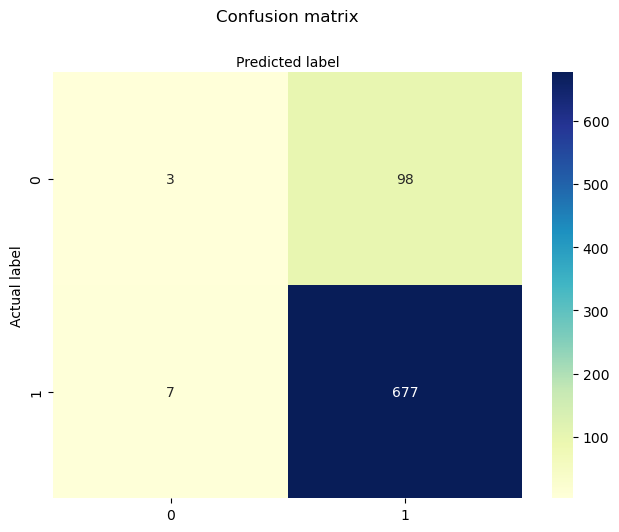

In [459]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [460]:
from sklearn.metrics import classification_report
target_names = ['living', 'dead']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      living       0.30      0.03      0.05       101
        dead       0.87      0.99      0.93       684

    accuracy                           0.87       785
   macro avg       0.59      0.51      0.49       785
weighted avg       0.80      0.87      0.82       785

